In [1]:
# T1: Data Pre-processing for spam dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Load the dataset
data = pd.read_csv("spam.csv", encoding="latin1")

# Keep only required columns
data = data[["v1", "v2"]]
data = data.rename(columns={"v1": "label", "v2": "message"})

# Display first few rows
print("Raw Data:\n", data.head())

# 2. Data Cleaning
# Handle missing values (if any)
data = data.dropna()

# Convert labels (spam/ham) into numerical (0/1)
label_encoder = LabelEncoder()
data["label_encoded"] = label_encoder.fit_transform(data["label"])

# 3. Feature Engineering
# Convert text messages into TF-IDF features
vectorizer = TfidfVectorizer(stop_words="english", max_features=3000)
X = vectorizer.fit_transform(data["message"])
y = data["label_encoded"]

# 4. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display shapes of training data
print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("First 5 labels:", y_train[:5])



Raw Data:
   label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Training features shape: (4457, 3000)
Training labels shape: (4457,)
First 5 labels: 184     0
2171    0
5422    0
4113    0
4588    0
Name: label_encoded, dtype: int64


Slope (m): [0.00238139]
Intercept (c): -0.05603913367001501


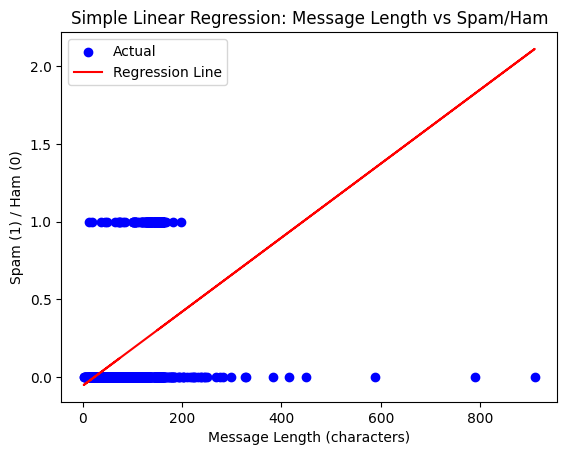

In [3]:
# T2: Simple Linear Regression on spam dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
data = pd.read_csv("spam.csv", encoding="latin1")
data = data[["v1", "v2"]]
data = data.rename(columns={"v1": "label", "v2": "message"})

# Create a numeric feature: message length
data["message_length"] = data["message"].apply(len)

# Convert label to numeric (ham=0, spam=1)
data["label_encoded"] = data["label"].map({"ham": 0, "spam": 1})

# Independent variable (X) and dependent variable (y)
X = data[["message_length"]]   # predictor
y = data["label_encoded"]      # target

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Print coefficients
print("Slope (m):", model.coef_)
print("Intercept (c):", model.intercept_)

# Plotting
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", label="Regression Line")
plt.xlabel("Message Length (characters)")
plt.ylabel("Spam (1) / Ham (0)")
plt.title("Simple Linear Regression: Message Length vs Spam/Ham")
plt.legend()
plt.show()


In [4]:
# T3: Cross Validation on spam dataset
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
data = pd.read_csv("spam.csv", encoding="latin1")
data = data[["v1", "v2"]]
data = data.rename(columns={"v1": "label", "v2": "message"})

# Convert labels (spam/ham) to 0/1
data["label_encoded"] = data["label"].map({"ham": 0, "spam": 1})

# Feature Engineering: Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words="english", max_features=3000)
X = vectorizer.fit_transform(data["message"])
y = data["label_encoded"]

# Define classifiers
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = LogisticRegression(max_iter=1000)

# Define K-Fold (10 splits)
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Cross Validation
scores1 = cross_val_score(clf1, X, y, cv=k_folds)
scores2 = cross_val_score(clf2, X, y, cv=k_folds)

# Print results
print("Cross Validation Scores (Decision Tree):", scores1)
print("Cross Validation Scores (Logistic Regression):", scores2)
print("Average CV Score (Decision Tree):", scores1.mean())
print("Average CV Score (Logistic Regression):", scores2.mean())
print("Number of CV Scores used in Average (Decision Tree):", len(scores1))
print("Number of CV Scores used in Average (Logistic Regression):", len(scores2))


Cross Validation Scores (Decision Tree): [0.96953405 0.9516129  0.97307002 0.96229803 0.97307002 0.98204668
 0.96947935 0.96409336 0.97307002 0.95691203]
Cross Validation Scores (Logistic Regression): [0.97311828 0.94623656 0.97486535 0.97307002 0.97845601 0.96947935
 0.96947935 0.97666068 0.96229803 0.96947935]
Average CV Score (Decision Tree): 0.9675186450712021
Average CV Score (Logistic Regression): 0.9693142989517577
Number of CV Scores used in Average (Decision Tree): 10
Number of CV Scores used in Average (Logistic Regression): 10


In [5]:
# T4: Performance Metrics on spam dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("spam.csv", encoding="latin1")
data = data[["v1", "v2"]]
data = data.rename(columns={"v1": "label", "v2": "message"})

# Convert labels: ham -> 0, spam -> 1
data["label_encoded"] = data["label"].map({"ham": 0, "spam": 1})

# Convert text to numerical features (TF-IDF)
vectorizer = TfidfVectorizer(stop_words="english", max_features=3000)
X = vectorizer.fit_transform(data["message"])
y = data["label_encoded"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 1. Decision Tree Classifier
dt = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_dt_pred)
print("Decision Tree Accuracy:", accuracy_dt)

# 2. Linear Regression (demo only, better use Logistic Regression for classification)
lrr = LinearRegression()
lrr.fit(X_train, y_train)
y_lrr_pred = lrr.predict(X_test)

mse = mean_squared_error(y_test, y_lrr_pred)
r2 = r2_score(y_test, y_lrr_pred)

print("Linear Regression MSE:", mse)
print("Linear Regression R²:", r2)


Decision Tree Accuracy: 0.9605381165919282
Linear Regression MSE: 0.26693191508877023
Linear Regression R²: -1.3056152829507717


In [6]:
# T5: Multiple Linear Regression on spam dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv("spam.csv", encoding="latin1")
data = data[["v1", "v2"]]
data = data.rename(columns={"v1": "label", "v2": "message"})

# Convert labels: ham -> 0, spam -> 1
data["label_encoded"] = data["label"].map({"ham": 0, "spam": 1})

# Convert text to numerical features using TF-IDF (multiple predictors)
vectorizer = TfidfVectorizer(stop_words="english", max_features=3000)
X = vectorizer.fit_transform(data["message"]).toarray()  # multiple independent variables
y = data["label_encoded"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Multiple Linear Regression model
lrr = LinearRegression()
lrr.fit(X_train, y_train)
y_lrr_pred = lrr.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_lrr_pred)
r2 = r2_score(y_test, y_lrr_pred)

print("Multiple Linear Regression MSE:", mse)
print("Multiple Linear Regression R²:", r2)


Multiple Linear Regression MSE: 0.267173908950445
Multiple Linear Regression R²: -1.3077054966506663


In [7]:
# T6: Logistic Regression on spam dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("spam.csv", encoding="latin1")
data = data[["v1", "v2"]]
data = data.rename(columns={"v1": "label", "v2": "message"})

# Encode labels: ham -> 0, spam -> 1
data["label_encoded"] = data["label"].map({"ham": 0, "spam": 1})

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words="english", max_features=3000)
X = vectorizer.fit_transform(data["message"])
y = data["label_encoded"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2, stratify=y
)

# Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

# Print shapes
print("y_test shape:", y_test.shape)
print("y_lr_pred shape:", y_lr_pred.shape)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_lr_pred)
print("Logistic Regression Accuracy:", accuracy_lr)


y_test shape: (1115,)
y_lr_pred shape: (1115,)
Logistic Regression Accuracy: 0.9641255605381166
